In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import imread
import seaborn as sns
%matplotlib inline
sns.set_context('poster')
sns.set_style({'grid.alpha': '.1'})

This image is:  <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


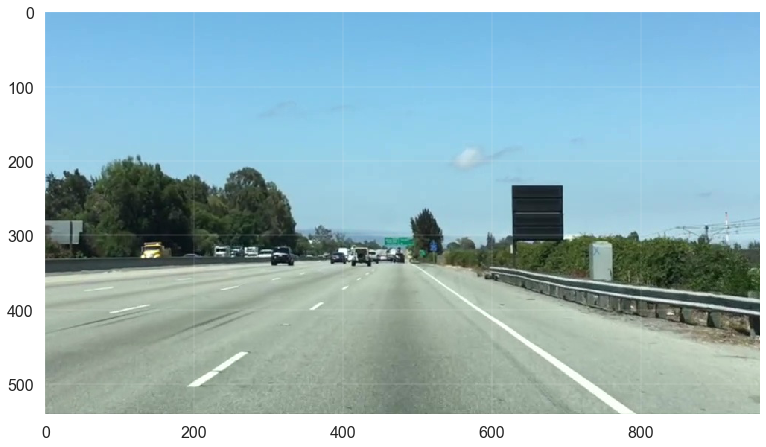

In [61]:
# Read in the image and print some stats
image = imread('test.jpg')
print('This image is: ', type(image), 
         'with dimensions:', image.shape)
plt.imshow(image)

In [68]:
# Pull out the x and y sizes and make a copy of the image
ysize = image.shape[0]
xsize = image.shape[1]
region_select = np.copy(image)

In [69]:
ysize, xsize

(540, 960)

In [70]:
# Define a triangle region of interest 
# Keep in mind the origin (x=0, y=0) is in the upper left in image processing
# Note: if you run this code, you'll find these are not sensible values!!
# But you'll get a chance to play with them soon in a quiz 
left_bottom = [0, ysize]
right_bottom = [xsize, ysize]
apex = [xsize/2, ysize/2]

In [71]:
# Fit lines (y=Ax+B) to identify the  3 sided region of interest
# np.polyfit() returns the coefficients [A, B] of the fit
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)


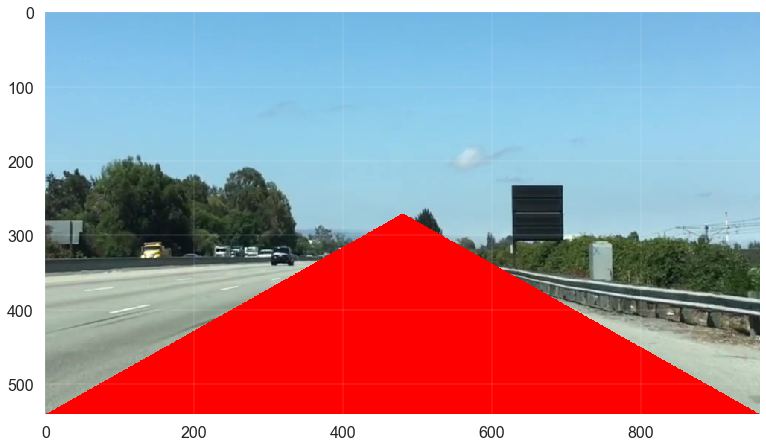

In [72]:
# Find the region inside the lines
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))

# Color pixels red which are inside the region of interest
region_select[region_thresholds] = [255, 0, 0]

# Display the image
plt.imshow(region_select)